In [1]:
# import preprocessing from sklearn
from sklearn import preprocessing
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix, f1_score

In [2]:
# df = pd.read_csv("UCI_Credit_Card.csv")
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target']=iris.target
df = data.select_dtypes(include=[int])
df

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
en = preprocessing.OneHotEncoder()

#2. FIT
en.fit(df)

#3. Transform
onehotlabels = en.transform(df).toarray()
onehotlabels.shape

(150, 3)

In [5]:
onehotlabels.dtype

dtype('float64')

In [6]:
# onehotlabels

In [7]:
type(onehotlabels)

numpy.ndarray

In [8]:
tre = pd.DataFrame(onehotlabels,columns = ['setosa', 'versicolor', 'virginica'])
tre

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
tre

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [11]:
data1 = pd.concat([data, tre],axis = 1)

In [12]:
# data1

In [13]:
# data.drop(columns='target',inplace = True)

In [14]:
data1.drop(columns='target',inplace = True)

In [15]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [16]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   setosa             150 non-null    float64
 5   versicolor         150 non-null    float64
 6   virginica          150 non-null    float64
dtypes: float64(7)
memory usage: 8.3 KB


Text(0.5, 1.0, 'Correlation sur les données')

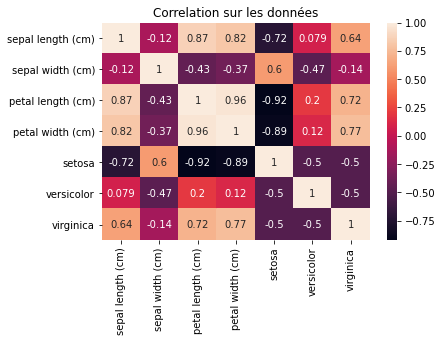

In [18]:
plt.figure(1)
sns.heatmap(data1.corr(), annot= True)
plt.title('Correlation sur les données')

In [19]:
X = np.array(data1.loc[:, ["sepal length (cm)","sepal width (cm)"] ])
# y = data1.setosa              
# y = data1.versicolor        
y = data1.virginica
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =5 )
# print(X_train)

In [20]:
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
# models = (clf.fit(X, y) for clf in models)

# title for the plots
# titles = (
#     "SVC with linear kernel",
#     "LinearSVC (linear kernel)",
#     "SVC with RBF kernel",
#     "SVC with polynomial (degree 3) kernel",
# )
for clf in models:
    clf.fit(X_train, Y_train)
    yhat= clf.predict(X_test)
    print(clf)
    mse = mean_squared_error(Y_test, yhat)
    score = clf.score(X_train, Y_train)
    print(mse)
    print(score)

SVC(kernel='linear')
0.2
0.8
LinearSVC(max_iter=10000)
0.16666666666666666
0.775
SVC(gamma=0.7)
0.13333333333333333
0.8166666666666667
SVC(gamma='auto', kernel='poly')
0.16666666666666666
0.8


In [38]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [34]:
from sklearn.pipeline import Pipeline
X, Y = make_classification(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=5)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, Y_train)

pipe.score(X_test, Y_test)

1.0

In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])